# Flights on December 2008 Data Exploration
## by Thais Ruiz

## Preliminary Wrangling

This document explores a dataset of 544,958 domestic flights operations on December 2008.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
from plotly.offline import init_notebook_mode, iplot
from collections import Counter

%matplotlib inline

init_notebook_mode(connected=True) # send Plotly output to notebook

# To force resize
plt.rcParams['figure.figsize'] = [15, 5]
# Source: https://stackoverflow.com/a/36368418

In [2]:
# load in the datasets into pandas dataframes
file_dir = 'C:/Users/DuranRuiz/Desktop/NanoDegree Data Analyst/Communicate Data Findings Project/Datasource'
os.chdir(file_dir)

flights_2008 = pd.read_csv('2008.csv')
airports = pd.read_csv('L_AIRPORT.csv')

In [3]:
# high-level overview of data shape and composition
print(flights_2008.shape)
print(flights_2008.dtypes)
print(flights_2008.head())

(7009728, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object
   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955  

In [4]:
print(airports.shape)
print(airports.dtypes)
print(airports.sample(10))

(6510, 2)
Code           object
Description    object
dtype: object
     Code                                        Description
5927  WI4     Middleton, WI: Middleton Municipal Morey Field
5629  ULQ            Tulua, Colombia: Heriberto Gil Martinez
4854  SBY  Salisbury, MD: Salisbury-Ocean City/Wicomico R...
283   ALG                Algiers, Algeria: Houari Boumediene
4984  SJD  San Jose del Cabo, Mexico: Los Cabos Internati...
1079  CJS  Ciudad Juarez, Mexico: Abraham Gonzalez Intern...
4175  OZR                              Ozark, AL: Cairns AAF
978   CDJ  Conceicao Do Araguaia, Brazil: Conceicao Do Ar...
2538  JAN  Jackson/Vicksburg, MS: Jackson Medgar Wiley Ev...
2477  ISQ                 Manistique, MI: Schoolcraft County


In [5]:
# Subset of domestic flights operations on Dec-2008
flights_0812 = flights_2008[(flights_2008.Month==12)]

# Remove columns: Year, Month, TaxiIn, TaxiOut, TailNum, ActualElapsedTime, CRSElapsedTime, AirTime, Distance 
flights_0812 = flights_0812[['DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',\
                             'UniqueCarrier', 'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Cancelled',\
                             'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',\
                             'SecurityDelay', 'LateAircraftDelay']]

In [6]:
# Merge origin/destination description fields from airport dataframe to flights_0812 dataframe
flights_0812 = pd.merge(flights_0812, airports, left_on='Origin', right_on='Code').drop('Code', axis=1)
flights_0812.rename(columns = {'Description':'OriginDescription'}, inplace = True)

flights_0812 =  pd.merge(flights_0812, airports, left_on='Dest', right_on='Code').drop('Code', axis=1)
flights_0812.rename(columns = {'Description':'DestDescription'}, inplace = True)

In [7]:
# Check merged columns
print(flights_0812.columns)
flights_0812.sample(5)[['Origin', 'Dest', 'OriginDescription', 'DestDescription']]

Index(['DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'ArrDelay', 'DepDelay',
       'Origin', 'Dest', 'Cancelled', 'CancellationCode', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'OriginDescription', 'DestDescription'],
      dtype='object')


,Origin,Dest,OriginDescription,DestDescription
155482,AUS,IAH,"Austin, TX: Austin - Bergstrom International","Houston, TX: George Bush Intercontinental/Houston"
42492,MSY,LAX,"New Orleans, LA: Louis Armstrong New Orleans I...","Los Angeles, CA: Los Angeles International"
152194,HOU,DAL,"Houston, TX: William P Hobby","Dallas, TX: Dallas Love Field"
149565,DFW,BWI,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...","Baltimore, MD: Baltimore/Washington Internatio..."
441203,BOI,GEG,"Boise, ID: Boise Air Terminal","Spokane, WA: Spokane International"


In [8]:
flights_0812.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544958 entries, 0 to 544957
Data columns (total 22 columns):
DayofMonth           544958 non-null int64
DayOfWeek            544958 non-null int64
DepTime              527926 non-null float64
CRSDepTime           544958 non-null int64
ArrTime              526376 non-null float64
CRSArrTime           544958 non-null int64
UniqueCarrier        544958 non-null object
FlightNum            544958 non-null int64
ArrDelay             524747 non-null float64
DepDelay             527926 non-null float64
Origin               544958 non-null object
Dest                 544958 non-null object
Cancelled            544958 non-null int64
CancellationCode     17779 non-null object
Diverted             544958 non-null int64
CarrierDelay         168647 non-null float64
WeatherDelay         168647 non-null float64
NASDelay             168647 non-null float64
SecurityDelay        168647 non-null float64
LateAircraftDelay    168647 non-null float64
OriginDe

In [9]:
# Change columns to category type
categories_cols = ['DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest']

for col in categories_cols:
    flights_0812[col] = flights_0812[col].astype('category')

In [10]:
flights_0812.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544958 entries, 0 to 544957
Data columns (total 22 columns):
DayofMonth           544958 non-null int64
DayOfWeek            544958 non-null category
DepTime              527926 non-null float64
CRSDepTime           544958 non-null int64
ArrTime              526376 non-null float64
CRSArrTime           544958 non-null int64
UniqueCarrier        544958 non-null category
FlightNum            544958 non-null int64
ArrDelay             524747 non-null float64
DepDelay             527926 non-null float64
Origin               544958 non-null category
Dest                 544958 non-null category
Cancelled            544958 non-null int64
CancellationCode     17779 non-null object
Diverted             544958 non-null int64
CarrierDelay         168647 non-null float64
WeatherDelay         168647 non-null float64
NASDelay             168647 non-null float64
SecurityDelay        168647 non-null float64
LateAircraftDelay    168647 non-null float64

In [11]:
flights_0812.sample(10)

,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,OriginDescription,DestDescription
337874,7,7,722.0,725,829.0,829,US,996,0.0,-3.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"Wilmington, NC: Wilmington International","Charlotte, NC: Charlotte Douglas International"
377630,8,1,2111.0,2115,530.0,539,B6,476,-9.0,-4.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"Oakland, CA: Metropolitan Oakland International","Boston, MA: Logan International"
14861,30,2,1246.0,1245,1353.0,1350,AA,1295,3.0,1.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...","Denver, CO: Denver International"
13923,7,7,1407.0,1413,1445.0,1454,OO,5876,-9.0,-6.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"Colorado Springs, CO: City of Colorado Springs...","Denver, CO: Denver International"
26801,12,5,708.0,710,808.0,815,WN,3309,-7.0,-2.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"Burbank, CA: Bob Hope","Las Vegas, NV: McCarran International"
234766,9,2,NaN,1120,NaN,1337,DL,1040,NaN,NaN,...,1,B,0,NaN,NaN,NaN,NaN,NaN,"Memphis, TN: Memphis International","Atlanta, GA: Hartsfield-Jackson Atlanta Intern..."
243260,4,4,705.0,714,809.0,829,EV,5612,-20.0,-9.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"Bristol/Johnson City/Kingsport, TN: Tri Cities","Atlanta, GA: Hartsfield-Jackson Atlanta Intern..."
6790,11,4,1930.0,1845,2102.0,2030,WN,1802,32.0,45.0,...,0,NaN,0,29.0,0.0,0.0,0.0,3.0,"Phoenix, AZ: Phoenix Sky Harbor International","Denver, CO: Denver International"
507296,21,7,1635.0,1455,1947.0,1817,US,429,90.0,100.0,...,0,NaN,0,90.0,0.0,0.0,0.0,0.0,"Phoenix, AZ: Phoenix Sky Harbor International","Kahului, HI: Kahului Airport"
354036,17,3,2125.0,2130,2245.0,2251,UA,742,-6.0,-5.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"Denver, CO: Denver International","Albuquerque, NM: Albuquerque International Sun..."


In [12]:
# Descriptive statistics for numeric variables

delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

print(flights_0812[['ArrDelay', 'DepDelay', 'Cancelled', 'Diverted'] + delay_cols].describe())

            ArrDelay       DepDelay      Cancelled       Diverted  \
count  524747.000000  527926.000000  544958.000000  544958.000000   
mean       16.680505      17.304380       0.032625       0.004463   
std        48.570617      44.880798       0.177652       0.066654   
min       -90.000000     -49.000000       0.000000       0.000000   
25%        -8.000000      -3.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%        23.000000      18.000000       0.000000       0.000000   
max      1655.000000    1597.000000       1.000000       1.000000   

        CarrierDelay   WeatherDelay       NASDelay  SecurityDelay  \
count  168647.000000  168647.000000  168647.000000  168647.000000   
mean       15.422806       4.435057      17.251395       0.072228   
std        39.539046      25.519685      31.153545       1.565449   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

### What is the structure of your dataset?

There are 544,958 entries in the dataset with information of flights operations on December 2008. It features airlines, origin/destination, flight dates, scheduled and actual arrival/departure times, delays time/causes and cancellation/divert status.

It has the following numeric variables:
- the ones related to time: departure/arrivals times and the delays which are the difference between the actual and scheduled times
- the time of delays caused by carrier, weather, NAS (National Airspace System), security and late aircraft. Their values are in minutes and the sum of these five totals the arrival delay, also measured in minutes. The delay causes for a flight could be multiple and only apply to delayed flights.

A flight is considered delayed when its arrival delay is longer than 15 minutes.

The whole flights dataset could be seen as it is comprised by four main datasets, which are exclusive among them:
on time (arrival delay is less than 15 minutes), delayed (arrival delays equal or greather than 15 minutes), cancelled and diverted.

Therefore, the categorical variables are:
- extractable directly from the dataframe like: days of week, airlines, origin/destination, delay causes (not their values in minutes), cancellation causes, and cancellation/divert status 
- derived from splitting the dataframe in the four flight categories per their (exclusive) statuses like: on time, delayed, cancelled and diverted 

Similarly as the causes of delays are applicable only for delayed flights, the same happens to causes of cancellation which are only applicable for cancelled flights. This means that for the rest of flights out of these two categories, the values are null on these delay/cancellation columns as corresponding.



### What is/are the main feature(s) of interest in your dataset?

I am most interested in figuring out which airlines had more flight delays and what are the causes on December 2008.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The main features of interest are the airlines and the delay variables: arrival and causes.
I expect the longest delays are close to the holidays time and at the end of December the winter conditions be the main cause of delays.

I deem convenient for the investigation, to remove the cancelled and diverted flights records, since their data is no relevant to the investigation.

### Data Subsets: On Time and Delayed Flights

In [13]:
# Remove cancelled and diverted flights data
cancelled = flights_0812.Cancelled==1
diverted  = flights_0812.Diverted==1

flights = flights_0812[(~cancelled) & (~diverted)].drop(['Cancelled', 'CancellationCode', 'Diverted'], axis=1)
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524747 entries, 0 to 544957
Data columns (total 19 columns):
DayofMonth           524747 non-null int64
DayOfWeek            524747 non-null category
DepTime              524747 non-null float64
CRSDepTime           524747 non-null int64
ArrTime              524747 non-null float64
CRSArrTime           524747 non-null int64
UniqueCarrier        524747 non-null category
FlightNum            524747 non-null int64
ArrDelay             524747 non-null float64
DepDelay             524747 non-null float64
Origin               524747 non-null category
Dest                 524747 non-null category
CarrierDelay         168647 non-null float64
WeatherDelay         168647 non-null float64
NASDelay             168647 non-null float64
SecurityDelay        168647 non-null float64
LateAircraftDelay    168647 non-null float64
OriginDescription    524747 non-null object
DestDescription      524747 non-null object
dtypes: category(4), float64(9), int64(4

In [14]:
# Subset On Time and Delayed flights
on_time = flights.ArrDelay<15
delayed = flights.ArrDelay>=15 # A flight is considered delayed if its (arrival) delay is over 15 minutes (inclusive)

on_time_flights = flights[on_time]
delayed_flights = flights[delayed]

In [15]:
# On Time flights data info
on_time_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356100 entries, 1 to 544957
Data columns (total 19 columns):
DayofMonth           356100 non-null int64
DayOfWeek            356100 non-null category
DepTime              356100 non-null float64
CRSDepTime           356100 non-null int64
ArrTime              356100 non-null float64
CRSArrTime           356100 non-null int64
UniqueCarrier        356100 non-null category
FlightNum            356100 non-null int64
ArrDelay             356100 non-null float64
DepDelay             356100 non-null float64
Origin               356100 non-null category
Dest                 356100 non-null category
CarrierDelay         0 non-null float64
WeatherDelay         0 non-null float64
NASDelay             0 non-null float64
SecurityDelay        0 non-null float64
LateAircraftDelay    0 non-null float64
OriginDescription    356100 non-null object
DestDescription      356100 non-null object
dtypes: category(4), float64(9), int64(4), object(2)
memory usage

In the On Time dataset, delay causes columns are extraneous and null. They should be removed.

In [16]:
# Removing delay causes columns on On Time flights dataset
on_time_flights = on_time_flights.drop(delay_cols, axis=1)
on_time_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356100 entries, 1 to 544957
Data columns (total 14 columns):
DayofMonth           356100 non-null int64
DayOfWeek            356100 non-null category
DepTime              356100 non-null float64
CRSDepTime           356100 non-null int64
ArrTime              356100 non-null float64
CRSArrTime           356100 non-null int64
UniqueCarrier        356100 non-null category
FlightNum            356100 non-null int64
ArrDelay             356100 non-null float64
DepDelay             356100 non-null float64
Origin               356100 non-null category
Dest                 356100 non-null category
OriginDescription    356100 non-null object
DestDescription      356100 non-null object
dtypes: category(4), float64(4), int64(4), object(2)
memory usage: 31.9+ MB


In [17]:
# Delayed flights data info
delayed_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168647 entries, 0 to 544956
Data columns (total 19 columns):
DayofMonth           168647 non-null int64
DayOfWeek            168647 non-null category
DepTime              168647 non-null float64
CRSDepTime           168647 non-null int64
ArrTime              168647 non-null float64
CRSArrTime           168647 non-null int64
UniqueCarrier        168647 non-null category
FlightNum            168647 non-null int64
ArrDelay             168647 non-null float64
DepDelay             168647 non-null float64
Origin               168647 non-null category
Dest                 168647 non-null category
CarrierDelay         168647 non-null float64
WeatherDelay         168647 non-null float64
NASDelay             168647 non-null float64
SecurityDelay        168647 non-null float64
LateAircraftDelay    168647 non-null float64
OriginDescription    168647 non-null object
DestDescription      168647 non-null object
dtypes: category(4), float64(9), int64(4

In [18]:
delayed_flights.describe()

,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,168647.000000,168647.000000,168647.000000,168647.000000,168647.000000,168647.000000,168647.000000,168647.000000,168647.000000,168647.000000,168647.000000,168647.000000,168647.000000
mean,17.181871,1465.941588,1399.721454,1563.466163,1581.413556,2357.344649,62.554721,53.529722,15.422806,4.435057,17.251395,0.072228,25.373235
std,8.293763,472.607571,439.679926,559.428175,463.076622,2061.331436,63.287180,64.200553,39.539046,25.519685,31.153545,1.565449,45.011729
min,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,15.000000,-34.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,1117.000000,1040.000000,1230.000000,1230.000000,658.000000,24.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,1510.000000,1425.000000,1642.000000,1624.000000,1676.000000,41.000000,35.000000,0.000000,0.000000,7.000000,0.000000,3.000000
75%,23.000000,1841.000000,1749.000000,2014.000000,1950.000000,3593.000000,77.000000,71.000000,15.000000,0.000000,22.000000,0.000000,33.000000
max,31.000000,2400.000000,2359.000000,2400.000000,2359.000000,9741.000000,1655.000000,1597.000000,1307.000000,1352.000000,903.000000,254.000000,1143.000000


In [19]:
# Compare sum of the causes of the delay columns with arrival delay

(delayed_flights[delay_cols].sum(axis=1) == delayed_flights['ArrDelay']).sum()

168647

The sum of the delay causes in minutes totals the arrival delay  in the  delayed flights subset

#### Proportion of On Time and Delayed Flights on December 2008

In [20]:
def plot_pie(sizes, colors, labels, title):
    patches, texts, autotexts = plt.pie(sizes, autopct='%.2f%%', startangle=90, colors=colors, labels=labels)
    plt.axis('square') # equal aspect ratio ensures that pie is drawn as a circle
    plt.title(title + '\n', fontsize=14);

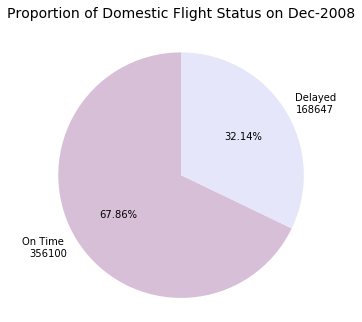

In [21]:
# Pie chart plotting

sizes  = [len(on_time_flights), len(delayed_flights)]
colors = ['thistle','lavender']
labels = ['On Time \n' + str(sizes[0]), 'Delayed \n' + str(sizes[1])]
title  = 'Proportion of Domestic Flight Status on Dec-2008'

plot_pie(sizes, colors, labels, title)

Out of 524,747 on track flights on December 2008, 356,100 were on time (67.86%) and 168,647 (32.14%) delayed. This set excludes the cancelled and diverted flights.
Flights with arrival delays over 15 minutes are the ones considered as 'delayed'.

## Univariate Exploration


#### Departure/Arrival Delays on December 2008

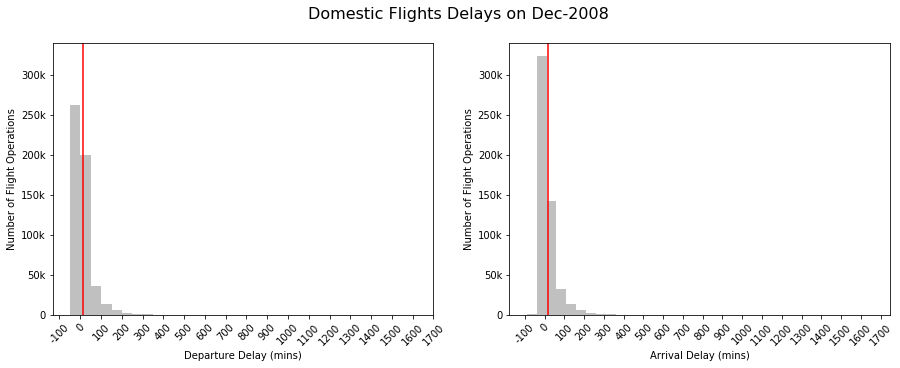

In [22]:
# Histogram plotting

fig = plt.figure(figsize = [15, 5])
fig.suptitle('Domestic Flights Delays on Dec-2008', fontsize=16)

# Departure and Arrival delays subset without Nan values
dep_delay = flights.DepDelay
arr_delay = flights.ArrDelay

dep_bins = np.arange(dep_delay.min(), dep_delay.max()+50, 50) 
arr_bins = np.arange(arr_delay.min(), arr_delay.max()+50, 50) 

xticks = [i*100 for i in np.arange(-1, 18)]
yticks = [i*5e4 for i in np.arange(0, 7)]
ylabels = ['0','50k', '100k', '150k', '200k', '250k', '300k']

ax1 = plt.subplot(1,2,1)
plt.hist(dep_delay, bins=dep_bins, color='silver')
plt.xlabel('Departure Delay (mins)')
plt.ylabel('Number of Flight Operations')
plt.xticks(xticks, xticks, rotation=45)
plt.yticks(yticks, ylabels)
plt.axvline(x=15, c='red');

ax2 = plt.subplot(1,2,2, sharey=ax1)
plt.hist(arr_delay, bins=arr_bins, color='silver')
plt.xlabel('Arrival Delay (mins)')
plt.ylabel('Number of Flight Operations')
plt.xticks(xticks, xticks, rotation=45)
plt.axvline(x=15, c='red');

Both of the above distributions are right skewed, with long tail.

On each plot, the red line divides the on time flights to the left, and the delayed ones to the right.
A flight is considered delayed when it has a delay of 15 or more minutes than the schedule.

Delay plots show many on time flights on Dec-2008: more than 250,000 for departure and more than 300,000 for arrivals; but still it is visible a bulk of delayed flights too: around 200,000 for departure and close to 150,000 for arrivals.

Interesting that the frequency for ontime flights are different in both plots; with an approximate difference around 50,000 flights, which delays are in the negative range from -100 to 0 minutes.

It might be worthy to explore these skewed distributions on a log scale.

To plot it on a log scale, the logarithym function has to be applied on the data, but since this one has negative values and the function applies only to positive values, it will be necessary to shift the data to the right side of the y-axis in the plot. How far right does it need to be shifted? I will take the minimum values +1 (to avoid calculation of log(0))

In [23]:
min_dep = dep_delay.min()
min_arr = arr_delay.min()
text = 'Since the minimum delay times are {} for departure and {} for arrival, then will add 50 and 91 to the data to set the minimum in 1s'
print(text.format(int(min_dep), int(min_arr)))

Since the minimum delay times are -49 for departure and -90 for arrival, then will add 50 and 91 to the data to set the minimum in 1s


(20, 600)

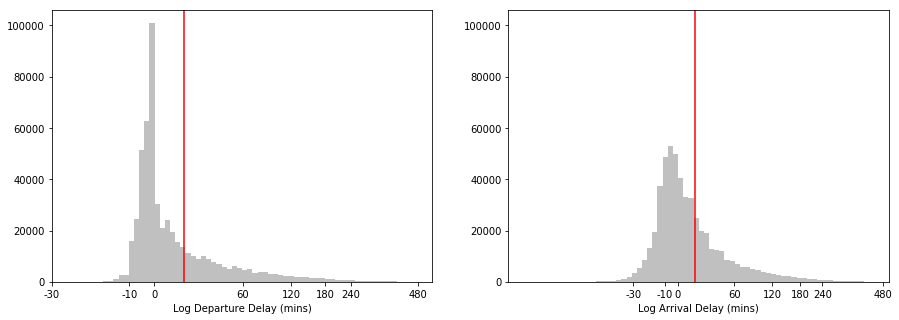

In [24]:
# Delayed departures and arrivals on a log scale

plt.figure(figsize = [15, 5]);
fig.suptitle('(Log) Domestic Flights Delays on Dec-2008', fontsize=16)

dep_del_50 = dep_delay+50
arr_del_91 = arr_delay+91

bin_size = .02
dep_bins = 10 ** np.arange(0, np.log10((dep_del_50).max())+bin_size, bin_size)
arr_bins = 10 ** np.arange(0, np.log10((arr_del_91).max())+bin_size, bin_size)

x_labels = [-30, -10, 0, 60, 120, 180, 240, 480]
xticks_dep = [x+50 for x in x_labels]
xticks_arr = [x+91 for x in x_labels]

# Departure delay subplot
ax1 = plt.subplot(1,2,1)
plt.hist(dep_del_50, bins=dep_bins, color='silver')
plt.xscale('log')
plt.xlabel('Log Departure Delay (mins)')
plt.xticks(xticks_dep, x_labels)
plt.axvline(15+50, color='r')
ax1.xaxis.set_minor_locator(plt.NullLocator());
plt.xlim(20,600)

# Arrival delay subplot
ax2 = plt.subplot(1,2,2, sharey=ax1)
plt.hist(arr_del_91, bins=arr_bins, color='silver')
plt.xscale('log')
plt.xlabel('Log Arrival Delay (mins)')
plt.xticks(xticks_arr, x_labels)
plt.axvline(15+91, color='r')
ax2.xaxis.set_minor_locator(plt.NullLocator());
plt.xlim(20,600)

When plotted on a log-scale, the distribution shape for departure delays is still right skewed, it looks logarithmic, while for arrival delays is more similar to a Normal distribution. The main peak on both distribution show very punctual flights, with frequencies on departure delays in the 100k and in the 50k (half of it) on arrival delays. Outliers seem to be located on delays above ~150-180 mins (>~ 2.5-3 hours) for both.

The red line divides on time flights to the left and delayed to the right on the x-axis. Since the size of both distributions was small in the original plot, it was necessary to set limits on the x-axis to be able to get a closer look on the bulk of the distributions.

#### Delay Causes on Dec-2008

Arrival delay times is the sum of the causes delay times; but the cause of a delay can be one or multiple.
Not all the listed causes contributes to arrival delay times, unless their values are greater than 0 minutes.

For this reason, the following histograms will plot the frequency of flights with delay causes time greater than 0 minute; delay causes with 0 minutes as values null them as delay causes by definition. 

In [25]:
delay_cols = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
col_labels = [col[:-5] for col in delay_cols]

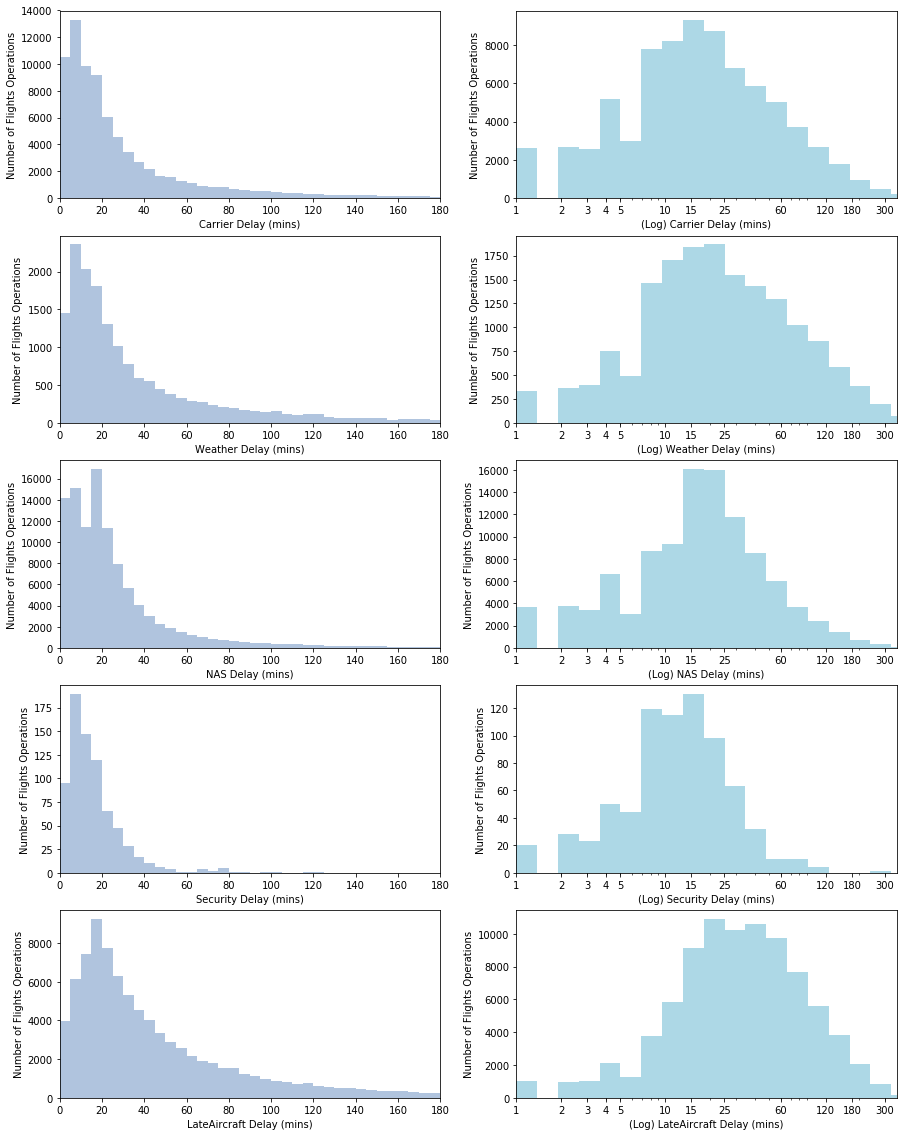

In [26]:
# Histogram subplotting in Scalar and Log scale
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=[15,20]);

for i in np.arange(0,10):
    plt.subplot(5,2,i+1)
    col = str(delay_cols[int(i/2)]) # cause column (string)
    data = delayed_flights[delayed_flights[col]>0] # causes with times different from 0 minutes


    if i%2 == 0: # histogram (left)

        binsize = 5
        bins = np.arange(0, data[col].max() + binsize, binsize)
               
        plt.hist(data=data, x=col, bins=bins, color='lightsteelblue')
        plt.xlabel(col[:-5] + ' Delay (mins)')

        # Remove from sight delays longer than 3 hours to get a closer look to the bulk of the distribution       
        plt.xlim(0,180)
  
    else: # histogram on log scale (right)

        binsize = 0.14
        log_bins = 10 ** np.arange(np.log10(data[col].min()), np.log10(data[col].max())+binsize, binsize)
        
        plt.hist(data=data, x=col, bins=log_bins, color='lightblue')
        plt.xscale('log')
        plt.xlabel('(Log) ' + col[:-5] + ' Delay (mins)')   
    
        xticks = [1, 2, 3, 4, 5, 10, 15, 25, 60, 120, 180, 300]
        plt.xticks(xticks, xticks)
       
        # Remove from sight delays longer than 6 hours to get a closer look to the bulk of the distribution       
        plt.xlim(0,360)

    plt.ylabel('Number of Flights Operations')


plt.show()

# Source: https://stackoverflow.com/questions/10035446/how-can-i-make-a-blank-subplot-in-matplotlib

Since the cause delays distributions have a logarithmic shape, they were plot on a log scale (on its right), and delays longer than 6 hours were trimmed off for visualization purposes to be able to focus in the concentrated area of the distributions.

On this scale, these distributions look pretty much Normal; with the main peak in the range of 13-25 minutes for carrier (frequency 10k), weather (frequency 1.8k) and NAS (frequency 16k) as delay causes; for security issues the main peak is located between 13-18 minutes (less than 140) and for late aircraft arrival between 18-25 minutes (frequency 11k).

In all of these distribution there is a little peak between 4-5 minutes.

Per their frequencies, it looks like that the least reason of delay might be due to security issues. The bell shape on the NAS delay distribution is a little narrow with high frequencies (small std. deviation), while for the rest of delay causes, the distributions look wider and short with lower frequencies (larger std. deviation).

In the bivariate exploration, these variables will be analyzed to check if they are related with others or among them.

####################
Air Carrier: The cause of the delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).

Extreme Weather: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.
Snowstorms, thunderstorms, hail, tornadoes, low clouds/fog, wind???


National Aviation System (NAS): Delays that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.

Late-arriving aircraft: A previous flight with same aircraft arrived late, causing the present flight to depart late.

Security: Delays caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

#### Flights Operations by Airlines on Dec-2008

In [27]:
# Dictionary of airlines codes and names
Airlines = {'9E':'Endeavor', 'AA':'American', 'AS':'Alaska', 'B6':'JetBlue', 'CO':'Continental', 'DL':'Delta', \
            'EV':'ExpressJet', 'F9':'Frontier', 'FL':'AirTran', 'HA': 'Hawaiian', 'MQ':'Envoy', 'NW':'Northwest',\
            'OH':'PSA', 'OO':'SkyWest', 'UA':'United', 'US':'US', 'WN': 'Southwest', 'XE':'ExpressJet (1)', 'YV':'Mesa'}

In [84]:
def plot_barh(data, groupby, color, height, label):
    
    gb_data = data.groupby(groupby).size().sort_values().reset_index()
    gb_data_idx = gb_data.index
    ax = plt.barh( gb_data_idx, gb_data[0], color=color, label=label, height=height );
    
    plt.title('Flight Operations per Airline on Dec-2008', fontsize=14)
    plt.xlabel('\n Number of Flight Operations', fontsize=12)
    plt.ylabel('Airlines', fontsize=12)

    xtk_locs = [5000*(i+1) for i in np.arange(0,19)]
    xtk_lbls = ['{}k'.format(str(i)[:-3]) for i in xtk_locs]
    plt.xticks(xtk_locs, xtk_lbls)

    ytk_lbls = [ Airlines[gb_data.UniqueCarrier[idx]] for idx in gb_data_idx ]
    plt.yticks(gb_data_idx, ytk_lbls);
              
    return ax

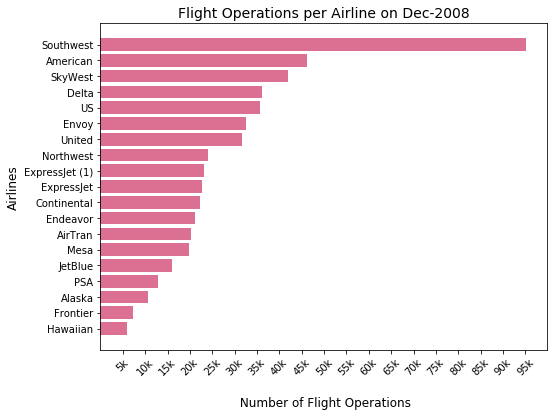

In [85]:
# Bar plotting
plt.figure(figsize=[8,6]);

plot_barh(flights, 'UniqueCarrier', 'palevioletred', .8, 'All flights');
plt.xticks(rotation=45);

The airline with more flight operations (almost 100,000) on Dec-2008 was Southwest, followed by American and Skywest (both airlines with operations above the mid 40,000). Southwest doubles the number of flight operations of the following top two!

On the bottom side, Frontier and Hawaiian Airlines, operated each one less than 10,000 flights that period.

It would be expected that the airlines with most number of operations, be the ones with more delays. But this exploration will take place in the Bivariate Exploration section.

#### Domestic Flights Operations per Days of Week

Since December has 31 days, 4 weeks + 3 days, the frequency of days of the week is 4 for four days and 5 for the other three days. To be fair on the Days of Week comparison, the frequency flights will be measured by the average of flights per day of the week.

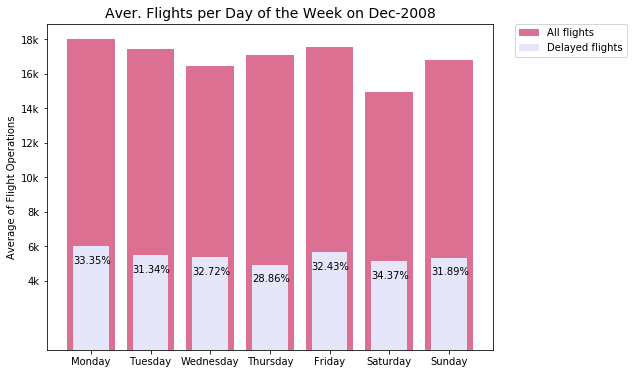

In [30]:
# Bar plotting
plt.figure(figsize=[8,6]);

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_frequency = [5,5,5,4,4,4,4]

groupby_day_wk = flights.groupby('DayOfWeek').count()[['DayofMonth']]
day_avg = groupby_day_wk.DayofMonth / days_frequency # average of flights per day of the week


groupby_day_wk2 = delayed_flights.groupby('DayOfWeek').count()[['DayofMonth']]
day_avg2 = groupby_day_wk2.DayofMonth / days_frequency # average of flights per day of the week


ax1 = plt.bar(day_avg.index, day_avg, color='palevioletred', label='All flights')
ax2 = plt.bar(day_avg2.index, day_avg2, color='lavender', label='Delayed flights', width=.6)

plt.title('Aver. Flights per Day of the Week on Dec-2008', fontsize=14)
plt.ylabel('Average of Flight Operations')
plt.xticks(np.arange(1,8), days)

plt.yticks([4000,6000,8000,10000,12000,14000,16000,18000],['4k','6k','8k','10k','12k','14k','16k', '18k']);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# Annotations in Delayed flights bars
ax1_patch_heights = [p.get_height() for p in ax1.patches]
ax2_patch_heights = [p.get_height() for p in ax2.patches]

texts=[ str(round(ax2_patch_heights[idx]*100 / ax1_patch_heights[idx],2))+'%' for idx in np.arange(0, len(days)) ]

for p in ax2.patches:
    idx = ax2.patches.index(p)
    plt.annotate(texts[idx], (p.get_x(), p.get_height()-1000))

On Dec-2008, the most popular traveling day was Monday (with and average of daily flight operations around 18k), followed very close by Friday and Tuesday (both days with a daily average of 17.5k flights approximately). The less popular traveling day was Saturday (average around 15k daily flights). This set excludes cancellations and diversions.

In regards to delayed flights, they follow the same order as above only for the top 3 days, Monday looks like the day with more delays (6k average), followed by Friday and Tuesday (around 5.5k). Wednesday is very near to Tuesday in delay average. The day with less delays seems Thursday and the next one Saturday (both days with average of ~5k flight operations per day).

However, by comparing the relative frequency on averages of daily flights operations, Saturday has the largest proportion of flight delays and then Mondays. Thursday remains at the bottom end, with the least proportion of delays.

#### Domestic Flights Timeline on Dec-2008

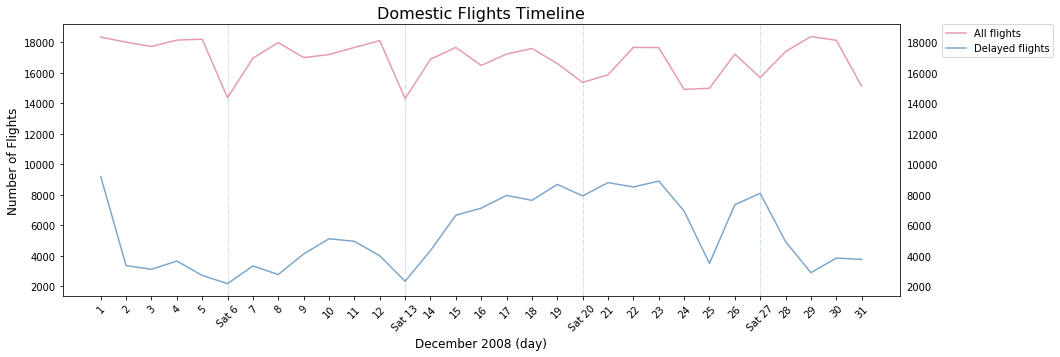

In [31]:
# Timeline plotting

groupby_day_all = flights.groupby('DayofMonth').size()
groupby_day_del = delayed_flights.groupby('DayofMonth').size()

# Stacking two plots
plt.errorbar(x=groupby_day_all.index, y=groupby_day_all, color='palevioletred',alpha=.7, label='All flights');
plt.errorbar(x=groupby_day_del.index, y=groupby_day_del, color='steelblue', alpha=.7, label='Delayed flights');

plt.title( 'Domestic Flights Timeline', fontsize=16)
plt.xlabel('December 2008 (day)', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)

# show tick labels in the right y-axis
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')

xtklocs = np.arange(1,32)
xlabels = ['Sat '+ str(i) if i%7==6 else str(i)for i in xtklocs] # Add 'Sat' text on Saturdays days
plt.xticks(xtklocs, xlabels, rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

for i in np.arange(0,4):
    plt.axvline(6+i*7, linestyle='dashdot', linewidth=.7, color='lightblue')

# Source: https://matplotlib.org/1.3.1/users/legend_guide.html

On the All Flights dataset (on-time and delayed), the line looks like a distorted 'M' in every period Saturday through Sunday on December 2008. The peaks of these "M" lines are situated mostly on Mondays and Fridays. The lower spikes are situated on the next days of these high peaks, being Saturdays the lowest (except on the last week of December).

From December 20th (a day before Hanukkah commences), the line shape is different from the previous weeks, and this exception might be due pretty much to the Holidays season. On Christmas days (Dec 24-25) the flight operations remain low.

Top frequency of flights reach the 18k, and the bottom one the 14.5k (Dec 6, 13). The maximum frequency (close to 19k) was on December 1st (first Monday after Thanksgiving 2008).

On the Delayed dataset, the story looks different: it does not look periodic at all.
The ascending trend of delays starts from Dec-13 until Dec-23, and it plummets on Christmas days. Then it soars again until Dec-27.
The delayed flights range from 2k to 9k, and over ~7k from Dec-16 until almost Christmas Eve (Dec-24).

#### Flights Operations from/to State on Dec-2008

In [32]:
def States(airport_loc):
    ''' Split the airport location fields (city:State and airport) and return the State'''
    airport_loc_fields = airport_loc.str.split(':')
    return [field[0][-2:] for field in airport_loc_fields]


# Count the ocurrences of each State, convert from Counter object to Series and sort descending by values
states_list  = States(flights.OriginDescription)
origin_valct = pd.Series(Counter(states_list)).sort_values(ascending=False)

# Count the ocurrences of each State, convert from Counter object to Series and sort by values
states_list  = States(flights.DestDescription)
destin_valct = pd.Series(Counter(states_list)).sort_values(ascending=False)

# https://stackoverflow.com/questions/2600191/how-can-i-count-the-occurrences-of-a-list-item

*Notice that there are 52 States, since PR (Puerto Rico) and VI (Virgin Islands) are included in the data.
For the State Heatmap, unfortunately there is no way under the parameter 'locationmode' to incorporate them in.*

In [33]:
# State Heatmaps plotting

scl = [ [0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
        [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)'] ]

data = []

layout = dict( title = 'Domestic Flights FROM / TO State on Dec-2008<br>')

location_status = ['FROM', 'TO']

for i in location_status:

    valct = origin_valct if i=='FROM' else destin_valct
    geo = 'geo' if i=='FROM' else 'geo2'
    domain_x = [0.0, 0.5] if i=='FROM' else [0.5, 1.0]
            
        
    data.append(
            dict(
                type='choropleth',
                colorscale = scl,
                autocolorscale = False,
                locations = valct.index,
                z = valct,
                locationmode='USA-states',
                marker = dict(line = dict(color='rgb(255,255,255)', width=2)),
                colorbar = dict(title="Flights Operations"),
                geo = geo
                )
            )
    
    # text on the corner of the map
    data.append(
            dict(
                type = 'scattergeo',
                showlegend = False,
                lon = [-78],
                lat = [47],
                geo = geo,
                text = i,
                mode = 'text'
                )
            )
    
    layout[geo] = dict(
                        scope = 'north america',
                        projection = dict( type='albers usa' ),
                        domain = dict(x = domain_x, y = [0.0, 1.0] )
                    )    

fig = dict( data = data, layout = layout )
iplot( fig, filename = 'origin-destin-cloropleth-map' )

# Source: https://datascience.stackexchange.com/questions/9616/how-to-create-us-state-heatmap
# Source: https://plot.ly/python/map-subplots-and-small-multiples/

Both maps looks pretty much the same, States have same shades regardless if they are origin or destination. It looks like the States have very similar frequency on flight operations; it is likely that these variables are highly correlated with one another.

Origin States with more flight operations (around 60k) on Dec-2008 were California (60,367) and Texas (57,048), followed by Florida (38,054), Georgia (34,484) and Illinois (32,264). On the bottom end below the 10k flights operations, are Wyoming (756), South Dakota (723),  North Dakota (626), Maine (567), Vermont (505) and West Virginia (331). The top ones are shaded darker and the bottom ones in lighter shades.

As regards to destination States, the order for the top ones and bottom ones is the same as for origin States.
The States with more flight operations (around 60k) on Dec-2008 are California (60,092) and Texas (57,032), followed by Florida (38,158), Georgia (34,495) and Illinois (32,110). On the bottom end below the 10k flights operations, are Wyoming (757), South Dakota (726),  North Dakota (634), Maine (594), Vermont (502) and West Virginia (330).

*These numbers are visible as hovering over the States in the map.*

It might be worthy to check the difference of flights operations frequency per State.

In [34]:
diff_valct = (origin_valct - destin_valct).sort_values(ascending=False)
diff_valct

CA    275
IL    154
MN     53
ID     50
OH     20
UT     17
TX     16
NH     11
CT      8
OK      7
VT      3
ME      3
MS      2
WV      1
LA      1
RI      0
AR      0
NC     -1
NM     -1
CO     -1
WY     -1
AK     -2
AL     -2
IN     -2
SD     -3
WI     -4
OR     -5
HI     -5
NE     -5
MT     -5
VA     -5
KS     -5
WA     -6
NJ     -7
MI     -7
KY     -8
ND     -8
PR     -9
AZ    -10
GA    -11
SC    -11
NV    -14
TN    -15
MD    -15
IA    -15
VI    -25
DC    -25
MA    -29
MO    -33
PA    -50
FL   -104
NY   -172
dtype: int64

The frequency of flights operations per State differs depending if they are origin or destination.

The States with greater differences are California (275 flights) and Illinois (154); however if we take in consideration their absolute difference, New York (172 flights) and Florida (104 flights) are in the top ones too (in this case, the negative difference means they have more flights as destinations than as origin).

The next States on these absolute differences are Minnesota (53), Idaho (50) and Pennsylvania (-50).

But these numbers will get meaning if compared with their relative frequency as origin or as destination.

In [35]:
# Proportion of frequency difference relative to origin

scl = [ [0.0, 'rgb(84,39,143)'],[0.2, 'rgb(117,107,177)'],[0.4, 'rgb(158,154,200)'],\
        [0.6, 'rgb(188,189,220)'],[0.8, 'rgb(218,218,235)'],[1.0, 'rgb(242,240,247)'] ]


perc_diff_valct = 100*diff_valct/origin_valct

data= [dict(
            type='choropleth',
            colorscale = scl,
            autocolorscale = False,
            locations = perc_diff_valct.index,
            z = perc_diff_valct,
            locationmode='USA-states',
            marker = dict(line = dict(color='rgb(255,255,255)', width=2)),
            colorbar = dict(title="Flights Operations Difference (%)"),
            )]
        
layout = dict( geo = dict( scope = 'north america',
                           projection = dict( type='albers usa' ) ),
               title = 'Relative Difference of Flights Operations per State on Dec-2008<br>')
    
fig = dict( data = data, layout = layout )
iplot( fig, filename = 'diff-origin-destin-cloropleth-map' )

In [36]:
perc_diff_valct.sort_values().head()

VI   -9.191176
ND   -1.277955
NY   -0.723753
IA   -0.705219
PR   -0.473186
dtype: float64

The State with higher relative difference on flights frequency is Idaho (in the lighter shade), with 2.49%. Taking in consideration the absolute difference, the shading bar on the right of the map shows minimum values around -9.19%; but no dark shadowed State is shown because this minimum value corresponds to Virgin Islands.

Since these relative differences are too small for the rest of the Country (the heatmap is very light all over), I deem this conducts to a dead end on this point.

#### Exploring Outliers

Outliers seem to be located for flights with arrival delays longer than ~2.5-3 hours.

In [37]:
# Calculate the limit where values would be considered outlier
Q1, median, Q3 = np.percentile(delayed_flights.ArrDelay, [25, 50, 75])
IQR = Q3 - Q1

low_val  = Q1 - 1.5 * IQR # bottom whisker in a boxplot
high_val = Q3 + 1.5 * IQR # top whisker in a boxplot

Q1, median, Q3, low_val, high_val

(24.0, 41.0, 77.0, -55.5, 156.5)

In [38]:
# Count Outliers and calculate their proportion
del_outliers  = delayed_flights[delayed_flights.ArrDelay>high_val]
num_outliers  = del_outliers.shape[0]
total_delayed = delayed_flights.shape[0]
outliers_prop = num_outliers*100 / total_delayed

print('Out of {} delayed flights, {} ({})% have delays longer than {} minutes, and these represent the outliers'.\
      format(total_delayed, num_outliers, round(outliers_prop,2), high_val))

Out of 168647 delayed flights, 12062 (7.15)% have delays longer than 156.5 minutes, and these represent the outliers


In [39]:
medium_delayed = delayed_flights[delayed_flights.ArrDelay<=high_val]

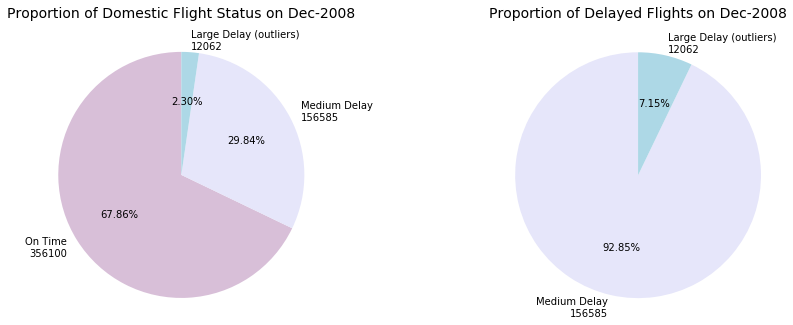

In [40]:
# Pie Chart plotting

fig= plt.figure()

# Proportion of flight statuses
ax1 = plt.subplot(1,2,1)

sizes  = [len(on_time_flights), len(medium_delayed), num_outliers]
colors = ['thistle','lavender', 'lightblue']
labels = ['On Time\n' + str(sizes[0]), 'Medium Delay\n' + str(sizes[1]), 'Large Delay (outliers)\n' + str(sizes[2])]
title  = 'Proportion of Domestic Flight Status on Dec-2008'

plot_pie(sizes, colors, labels, title)


ax2 = plt.subplot(1,2,2)

sizes  = [total_delayed-num_outliers, num_outliers]
labels = ['Medium Delay\n' + str(sizes[0]), 'Large Delay (outliers)\n' + str(sizes[1])]
title  = 'Proportion of Delayed Flights on Dec-2008'

plot_pie(sizes, colors[-2:], labels, title)

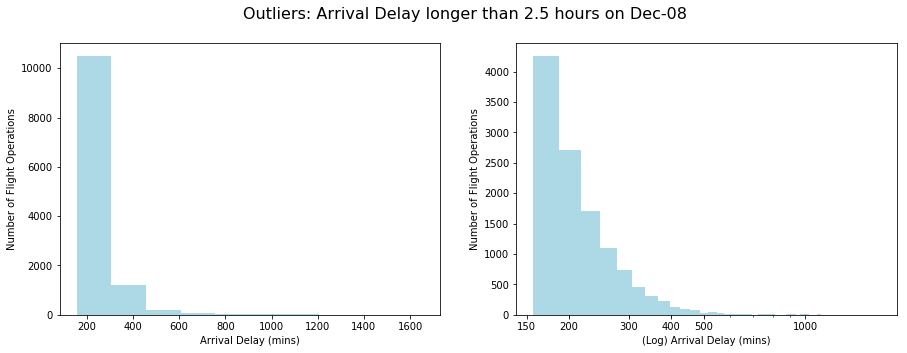

In [41]:
# Histogram plotting
fig= plt.figure()
fig.suptitle('Outliers: Arrival Delay longer than 2.5 hours on Dec-08', fontsize=16)

ax1 = plt.subplot(1,2,1)
plt.hist(del_outliers.ArrDelay, color='lightblue')
plt.xlabel('Arrival Delay (mins)')
plt.ylabel('Number of Flight Operations')

# Histogram on a log scale
ax2 = plt.subplot(1,2,2)
plt.hist(del_outliers.ArrDelay, color='lightblue', bins=50)
plt.xscale('log')
plt.xlabel('(Log) Arrival Delay (mins)')
plt.ylabel('Number of Flight Operations');
xticks = [150, 200, 300, 400, 500, 1000]
plt.xticks(xticks, xticks);

By plotting the tail of the Arrival Delay variable, which represent the outliers, its distribution show a logarithmic shape. The plot was recreated in a logarithmic scale (plot on the right), but still it is right-skewed.

In [42]:
del_outliers.DayofMonth.value_counts().head()

19    1207
23    1158
21     924
20     912
26     810
Name: DayofMonth, dtype: int64

Outliers seem to be more frequent from Friday Dec-19 until Monday Dec-23 (a day before Christmas eve)

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Since the  distributions of the delay times variables are right skewed with long tails, logarithm transformation was  applied to all of them. Since the arrival delay variable includes negative values, its distribution was shifted to the right side of the y-axis to place it on the positive values quadrant, and then the logarithm transformation was applied on all of its (now positive) values. Under the transformation these variables look roughly normal on the bulk of the data with  still right long tail.

The long tail of these distributions were identified as outliers (delays longer than 156.5 minutes (~2.5 hours)).


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In the preliminary wrangling phase the whole data was split in four datasets, cancelled and diverted which were removed since their data was not relevant for the investigation, and the on-time and delayed flights (delays longer than 15 minutes). The delayed flights were split in two subsets: medium-delay and large-delay (the last one contains the arrival delay outliers: delays longer than ~2.5 hours).

The last subsetting was done in order to explore the proportion of outliers in the delayed dataset.

## Bivariate Exploration

Since the purpose of the analysis is to determine which airlines had more flight delays and what are the causes on December 2008, the variables on interest are the following classified as:

1. Numeric:
    - departure and arrival delays (in minutes), which are calculated differences between the actual and schedule departure/arrival times, as corresponding.
    - (arrival) delay causes (in minutes): carrier, weather, NAS, security, late aircraft

2. Categorical:
    - days of week, airlines (19), (origin/destination) States (52), the (5) delay causes (applicable only for delayed flights) and flight statuses (on time, delayed).
    
In this (bivariate) exploration, the objective is to find the relationship between them if any, mostly in the delayed flights domain.

As the origin/destinations States are variables with many categories (52) and to limit the scope of this project, these are not going to be used further the previous exploration.

In [43]:
# Melt delay causes to create a category 'CauseDelay'
id_vars = list(delayed_flights.columns[:-7]) + list(delayed_flights.columns[-2:])

delayed = pd.melt(delayed_flights, id_vars=id_vars, value_vars=delay_cols, var_name='CauseDelay', value_name='Delay')
delayed = delayed[delayed.Delay>0] # subset with causes delays time > 0 minutes
delayed['CauseDelay'] = delayed['CauseDelay'].str[:-5] # remove the ending 'Delay' from 'Cause' strings
delayed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287379 entries, 0 to 843233
Data columns (total 16 columns):
DayofMonth           287379 non-null int64
DayOfWeek            287379 non-null int64
DepTime              287379 non-null float64
CRSDepTime           287379 non-null int64
ArrTime              287379 non-null float64
CRSArrTime           287379 non-null int64
UniqueCarrier        287379 non-null object
FlightNum            287379 non-null int64
ArrDelay             287379 non-null float64
DepDelay             287379 non-null float64
Origin               287379 non-null object
Dest                 287379 non-null object
OriginDescription    287379 non-null object
DestDescription      287379 non-null object
CauseDelay           287379 non-null object
Delay                287379 non-null float64
dtypes: float64(5), int64(5), object(6)
memory usage: 37.3+ MB


In [44]:
# Change columns to category type
categories_cols = ['DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest', 'CauseDelay']

for col in categories_cols:
    delayed[col] = delayed[col].astype('category')

delayed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287379 entries, 0 to 843233
Data columns (total 16 columns):
DayofMonth           287379 non-null int64
DayOfWeek            287379 non-null category
DepTime              287379 non-null float64
CRSDepTime           287379 non-null int64
ArrTime              287379 non-null float64
CRSArrTime           287379 non-null int64
UniqueCarrier        287379 non-null category
FlightNum            287379 non-null int64
ArrDelay             287379 non-null float64
DepDelay             287379 non-null float64
Origin               287379 non-null category
Dest                 287379 non-null category
OriginDescription    287379 non-null object
DestDescription      287379 non-null object
CauseDelay           287379 non-null category
Delay                287379 non-null float64
dtypes: category(5), float64(5), int64(4), object(2)
memory usage: 28.3+ MB


In [45]:
delayed.head()

,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,OriginDescription,DestDescription,CauseDelay,Delay
0,3,3,1126.0,1045,1241.0,1200,WN,2717,41.0,41.0,ABQ,DEN,"Albuquerque, NM: Albuquerque International Sun...","Denver, CO: Denver International",Carrier,1.0
2,8,1,1900.0,1725,2043.0,1840,WN,3101,123.0,95.0,ABQ,DEN,"Albuquerque, NM: Albuquerque International Sun...","Denver, CO: Denver International",Carrier,47.0
4,14,7,1050.0,1040,1214.0,1155,WN,667,19.0,10.0,ABQ,DEN,"Albuquerque, NM: Albuquerque International Sun...","Denver, CO: Denver International",Carrier,4.0
5,15,1,1737.0,1725,1855.0,1840,WN,3101,15.0,12.0,ABQ,DEN,"Albuquerque, NM: Albuquerque International Sun...","Denver, CO: Denver International",Carrier,12.0
6,17,3,1752.0,1725,1901.0,1840,WN,3101,21.0,27.0,ABQ,DEN,"Albuquerque, NM: Albuquerque International Sun...","Denver, CO: Denver International",Carrier,5.0


In [46]:
numeric_vars = ['ArrDelay', 'DepDelay'] + delay_cols
categor_vars = ['DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest', 'OriginDescription', 'DestDescription', 'CauseDelay']

#### Numeric variables of Delayed Flights

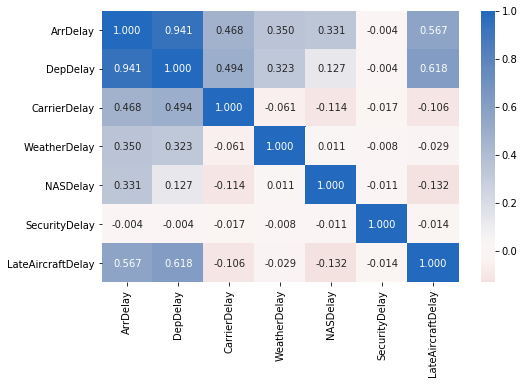

In [47]:
# correlation plot
plt.figure(figsize = [8, 5]);
sb.heatmap(delayed_flights[numeric_vars].corr(), annot=True, fmt='.3f', cmap='vlag_r', center=0);
plt.show()

0.9-1 indicate very highly correlated, 
0.7-0.9 indicate variables highly correlated, 
0.5-0.7 indicate variables moderately correlated, 
0.3-0.5 indicate low correlation, 
0-0.3 have little if any (linear) correlation

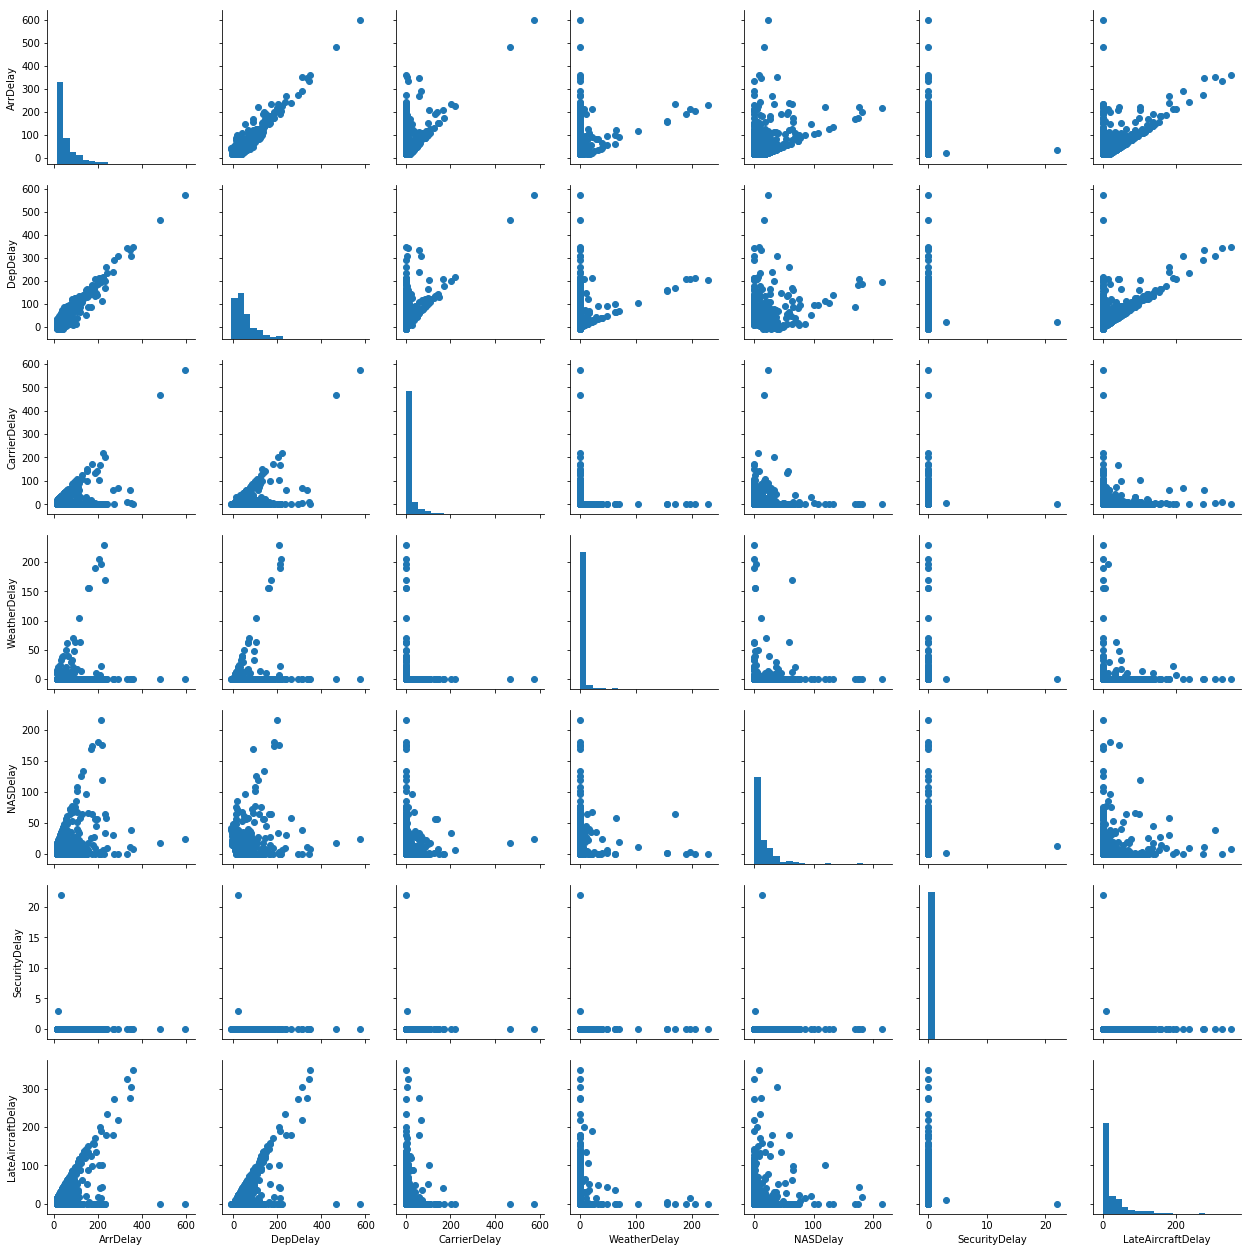

In [48]:
# plot matrix: sample 500 delayed flights so that plots are clearer and they render faster

samples = np.random.choice(delayed_flights.index, 500, replace=False)
flights_samp = delayed_flights.loc[samples,:]

g = sb.PairGrid(data=flights_samp, vars=numeric_vars);
g = g.map_diag(plt.hist, bins=20);
g.map_offdiag(plt.scatter);

- Arrival delay is very high correlated with departure delay (correlation coefficient .941)
- Departure delays are moderately correlated with late-arriving aircraft (correlation coefficient .618): which it is a little surprising; it would be expected a higher coefficient, since  when previous flight with same aircraft arrives late, cause the present flight to depart late. 
- However, main cause of delayed flights (arrival delays longer than 15 minutes) seems to be due to previuos late-arriving aircraft (.567 is the highest correlation coefficient in the arrival delay row among delay causes). It might be a domino effect from delayed departures per the correlation coefficient (.618).
- Security issues looks like the least contributing reason for delays (coefficient 0.004, the lowest in the correlation plot)
- Delay causes do not show to be correlated among them (coefficients in the lighter shades with values close to 0 in the heatmap). The 'L' shape distributions in the scatter plots might imply that there is not linear relation between them either. It might make sense since they are exclusive.

PLOTS TO DO FOR DELAYED FLIGHTS BETWEEN:
Num vs Cat: Violin, Boxplots, Adapted Bar Chart

2- Arrival Delay vs Delay Causes: numeric vs numeric (BOXPLOT / VIOLIN), numeric vs categorical

1- Arrival Delay vs DOWeek/DOMonth

3- Arrival Delay vs Airline (BOXPLOT)

***4- Arrival Delay vs origin/destination (CITY): Atlanta ATL, Los Angeles LAX, O'Hare International Airport Chicago ORD, Dallas/Fort Worth International Airport DFW, 
JFK NY, DEN Denver, SFO Sn Fco, LAS Las Vegas, PHX Phoenix, IAH Houston

Cat vs Cat: Clustered Bar Chart

***5- Airlines vs cities

6- Airlines vs delay causes: numeric vs categorical, cat vs cat

***7- Cities vs delay Causes: numeric vs categorical, cat vs cat (HEATMAP)

8- Date vs Delay (CONTEO DE DELAYS)


#### 2a. Arrival Delays per (numeric) Causes (cover in the PairGrid with scatters!)

#### 2b. Arrival Delays per Causes (as categorical)

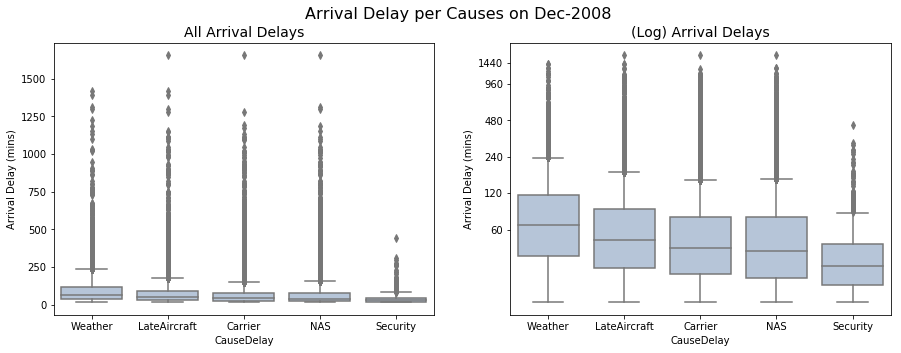

In [49]:
# Box Plotting 

fig = plt.figure(figsize = [15, 5]);
fig.suptitle('Arrival Delay per Causes on Dec-2008', fontsize=16)

order = delayed.groupby('CauseDelay')['ArrDelay'].median().sort_values(ascending=False).index

ax1 = plt.subplot(1,2,1)
sb.boxplot(data=delayed, x='CauseDelay', y='ArrDelay', color='lightsteelblue', order=order);
plt.title('All Arrival Delays', fontsize=14)
plt.ylabel('Arrival Delay (mins)')


# On log y-scale
ax2 = plt.subplot(1,2,2)
sb.boxplot(data=delayed, x='CauseDelay', y=delayed.ArrDelay, color='lightsteelblue', order=order);
plt.yscale('log')
plt.title('(Log) Arrival Delays', fontsize=14)
plt.ylabel('Arrival Delay (mins)')

yticks = [60, 120, 240, 480, 960, 1440]
plt.yticks(yticks, yticks);
ax2.yaxis.set_minor_locator(plt.NullLocator());

On the left plot, the outliers impedes the visualization of the bulk of the data. On the right, the plot is recreated on a log scale since the distribution of arrival delay is a very long-tailed. 

The main cause of delayed flights seems to be the weather conditions, followed by the late-arriving aircraft, and the least contributing cause seems to be the one related to security issues.

NAS and carrier issues look very even as contributing causes to arrival delays.

#### 3. Arrival Delay vs Airlines

This visualization will be plot on a log scale per the long-tailed distribution shape of the Arrival Delay variable.

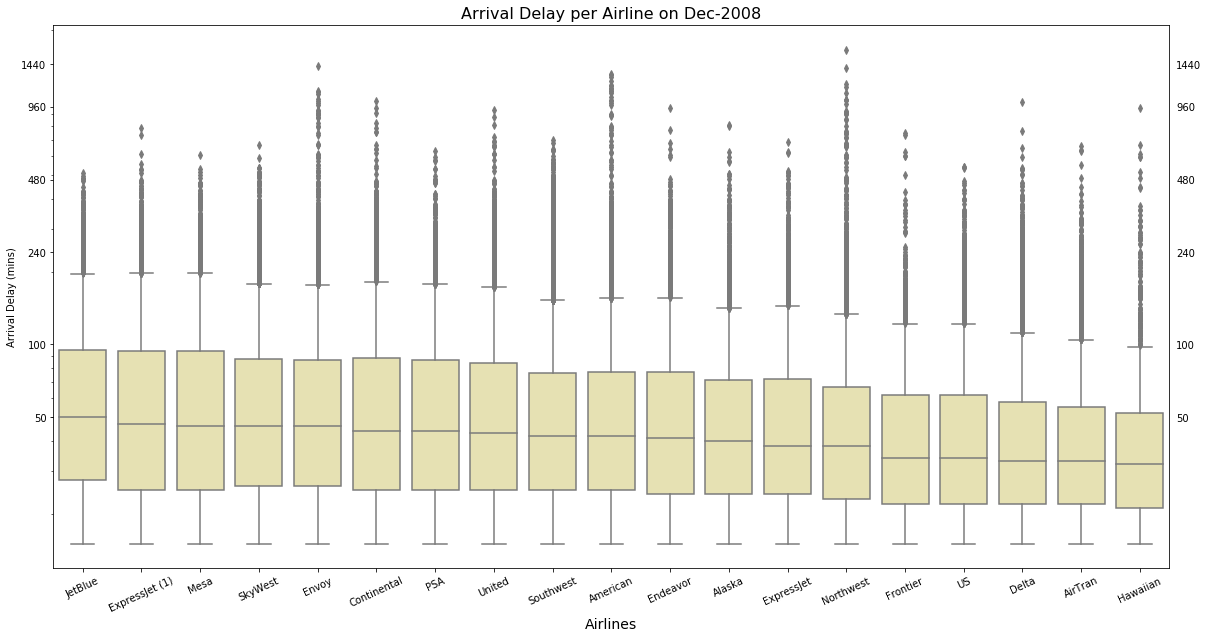

In [50]:
# Box Plotting 

fig = plt.figure(figsize=(20, 10))

order = delayed_flights.groupby('UniqueCarrier')['ArrDelay'].median().sort_values(ascending=False).index
sb.boxplot(data=delayed_flights, x='UniqueCarrier', y=delayed_flights['ArrDelay'], color='palegoldenrod', order=order);
plt.yscale('log')
plt.title('Arrival Delay per Airline on Dec-2008', fontsize=16)
plt.xlabel('Airlines', fontsize=14)
plt.ylabel('Arrival Delay (mins)')

xlocs, xlabels = plt.xticks()
xlabl = [Airlines[label.get_text()] for label in xlabels]
plt.xticks(xlocs, xlabl, rotation = 25);
yticks = [50, 100, 240, 480, 960, 1440]
plt.yticks(yticks, yticks);

# show tick labels in the right y-axis
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
ax2.yaxis.set_minor_locator(plt.NullLocator());

Northwest, Envoy and American Airlines look like the carriers with longer delays.

JetBlue, Expressjet(1) and Mesa seems to be the top airlines with more delays, per the median; and Delta, AirTran and Hawaiian the carriers with the least delays (per the median too).

However, proportion of delays per amount of operations by each airline might bring fairness to this comparison.

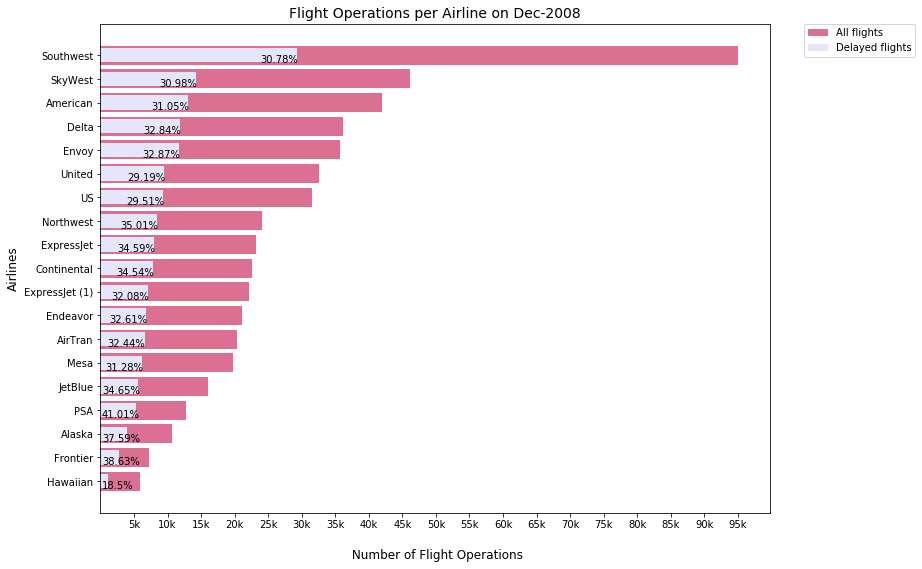

In [86]:
# Bar plotting
plt.figure(figsize=[12,9]);

ax1 = plot_barh(        flights, 'UniqueCarrier', 'palevioletred', .8, 'All flights');
ax2 = plot_barh(delayed_flights, 'UniqueCarrier',      'lavender', .6, 'Delayed flights');

# CORREGIR porque ylabels de ax2 son los desplegados!!!
locs, labels = plt.yticks() 
#ylabels = [ Airlines[groupby_all.UniqueCarrier[idx]] for idx in locs ]
plt.yticks(locs, ylabels);

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# Annotations in Delayed flights bars
ax1_patch_widths = [p.get_width() for p in ax1.patches]
ax2_patch_widths = [p.get_width() for p in ax2.patches]

texts=[ str(round(ax2_patch_widths[idx]*100 / ax1_patch_widths[idx],2))+'%' for idx in np.arange(0, len(Airlines)) ]

# Annotation for the top bars
for p in ax2.patches[5:]:
    idx = ax2.patches.index(p)
    plt.annotate(texts[idx], (p.get_width()-5500, p.get_y()))

# Annotation for the (5) bottom bars
for p in ax2.patches[:5]:
    idx = ax2.patches.index(p)
    plt.annotate(texts[idx], (200, p.get_y()))

In [87]:
ax1.get_yticks()

AttributeError: 'BarContainer' object has no attribute 'get_yticks'

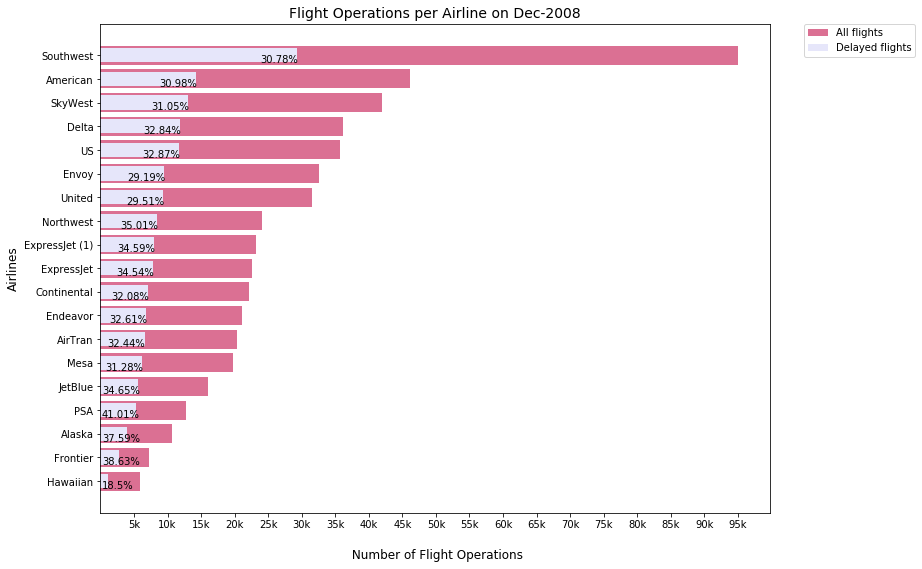

In [53]:
# Bar plotting
plt.figure(figsize=[12,9]);

groupby_all =         flights.groupby('UniqueCarrier').size().sort_values().reset_index()
groupby_del = delayed_flights.groupby('UniqueCarrier').size().sort_values().reset_index()
    
ax1 = plt.barh(groupby_all.index, groupby_all[[0]].values, color='palevioletred', label='All flights');
ax2 = plt.barh(groupby_del.index, groupby_del[[0]].values, height=.6, color='lavender', label='Delayed flights');

plt.title('Flight Operations per Airline on Dec-2008', fontsize=14)
plt.xlabel('\n Number of Flight Operations', fontsize=12)
plt.ylabel('Airlines', fontsize=12)

ylabels = [ Airlines[groupby_all.UniqueCarrier[idx]] for idx in groupby_all.index ]
plt.yticks(groupby_all.index, ylabels);

xlocs = [5000*(i+1) for i in np.arange(0,19)]
xlabels = ['{}k'.format(str(i)[:-3]) for i in xlocs]
plt.xticks(xlocs, xlabels)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# Annotations in Delayed flights bars
ax1_patch_widths = [p.get_width() for p in ax1.patches]
ax2_patch_widths = [p.get_width() for p in ax2.patches]

texts=[ str(round(ax2_patch_widths[idx]*100 / ax1_patch_widths[idx],2))+'%' for idx in np.arange(0, len(Airlines)) ]

# Annotation for the top bars
for p in ax2.patches[5:]:
    idx = ax2.patches.index(p)
    plt.annotate(texts[idx], (p.get_width()-5500, p.get_y()))

# Annotation for the bottom bars
for p in ax2.patches[:5]:
    idx = ax2.patches.index(p)
    plt.annotate(texts[idx], (200, p.get_y()))

In [ ]:
x=

On this plot, PSA has the most proportion of delays (41.01%), then Frontier (38.63%), Alaska (37.59%) and Northwest (35.01%).

All of these four carriers have the headquarters on the North of the country, were the winter conditions might affect the flights on these airports: PSA (Vandalia, OH), Frontier (Denver, CO), Alaska (Seattle, WA), Northwest (Eagan, MN)
WILL CHECK WHAT ARE THE CAUSES FOR THESE AIRLINES

The carriers with less proportion of delays: Hawaiian (18.5%), Envoy (29.19%) and United (29.51%)

41.01 PSA
38.63 Frontier
37.59 Alaska
35.01 Northwest
34.65 JetBlue
34.59 ExpressJet (1)
34.54 ExpressJet
32.87 US
32.84 Delta
32.61 Endeavor
32.44 AirTran
32.08 Continental
31.28 Mesa
31.05 SkyWest
30.98 American
30.78 Southwest
29.51 United
29.19 Envoy
18.5  Hawaiian

#### 1a. Arrival Delays vs Days Of Week

In [ ]:
# Box Plotting

fig = plt.figure(figsize = [15, 5]);
fig.suptitle('Arrival Delay per Day of Week', fontsize=16)

order = delayed_flights.groupby('DayOfWeek')['ArrDelay'].quantile(.75).sort_values(ascending=False).index

ax1 = plt.subplot(1,2,1)
sb.boxplot(data=delayed_flights, x='DayOfWeek', y='ArrDelay', color='lightsteelblue', order=order);
plt.title('All Arrival Delays', fontsize=14)
plt.xlabel('')
plt.ylabel('Arrival Delay (mins)')
plt.xticks(np.arange(0,7), [days[i-1][:3] for i in order])

# On log y-scale
ax2 = plt.subplot(1,2,2)
sb.boxplot(data=delayed_flights, x='DayOfWeek', y=delayed_flights.ArrDelay, color='lightsteelblue', order=order)
plt.yscale('log')
plt.title('(Log) Arrival Delays', fontsize=14)
plt.xlabel('')
plt.ylabel('Arrival Delay (mins)')
plt.xticks(np.arange(0,7), [days[i-1][:3] for i in order])

yticks = [25, 45, 90, 180, 1080, 1500]
plt.yticks(yticks, yticks);
ax2.yaxis.set_minor_locator(plt.NullLocator());

On the left plot, the outliers impedes the visualization of the bulk of the data. On the right, the plot is recreated on a log scale (just for visualization purposes) since the distribution of arrival delays is a very long-tailed. 

Fridays seem to be the day with more and longer (arrival) delays and Thurdays the least. In descendent order, arrival delays per days of week looks like this: Fri, Sat, Sun, Mon, Wed, Tue and Thu.

#### 1b. Arrival Delays vs Days Of Month

In [ ]:
# Timeline plotting

groupby_day_all = flights.groupby('DayofMonth').mean()[['ArrDelay']]
groupby_day_del = delayed_flights.groupby('DayofMonth').mean()[['ArrDelay']]

# Stacking two plots
plt.errorbar(x=groupby_day_all.index, y=groupby_day_all, alpha=.7, label='All flights');
plt.errorbar(x=groupby_day_del.index, y=groupby_day_del, color='peru', alpha=.7, label='Delayed flights');

plt.title( 'Average Arrival Delay Timeline', fontsize=16)
plt.xlabel('December 2008 (day)', fontsize=12)
plt.ylabel('Average Arrival Delay (mins)', fontsize=12)

# show tick labels in the right y-axis
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')

xtklocs = np.arange(1,32)
xlabels = ['Sat '+ str(i) if i%7==6 else str(i)for i in xtklocs] # Add 'Sat' text on Saturdays days
plt.xticks(xtklocs, xlabels, rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

for i in [2,3,5,6,26,27]:
    plt.axvline(i, linestyle='dashdot', linewidth=.7, color='lightblue')

The lines look very parallel, as they would keep similar differences.

Exceptions are visible on Wed-3, Sat-6 (week after Thanksgiving) and Sat-27 (after Christmas): when average arrival delays time increase/decrease in the all-flights dataset, these averages decrease/increase respectively for delayed flights.

In both datasets, arrival delays drop the first week after Thanksgiving and then increased between Mon-8 through Wed-10. The next ascending trend stars on Sat-13 through Fri-19 (when it reaches the maximum delay, more than 80 minutes average), with alternate subsequent peaks on Dec-21 and Dec-23.

Winter conditions and destinations!!!

#### 4a. Airlines vs Delay Causes (numeric)

In [ ]:
fig = plt.figure(figsize=(15, 35))

for col in delay_cols:
    idx = delay_cols.index(col)
    plt.subplot(5,1,idx+1)
    data = delayed_flights[delayed_flights[col]>0]
    order = data.groupby('UniqueCarrier')[col].median().sort_values(ascending=False).index
    ax = sb.boxplot(data=data, x='UniqueCarrier', y=col, color='palegoldenrod', order=order);
    plt.yscale('log')
    plt.xlabel('Airline')
    plt.ylabel(col[:-5] + ' Delay (mins)')
    
    xlocs, xlabels = plt.xticks()
    xlabl = [Airlines[label.get_text()] for label in xlabels]
    plt.xticks(xlocs, xlabl, rotation = 25)
    yticks = [30, 50, 100, 240, 480, 960, 1440]
    plt.yticks(yticks, yticks);

    # show tick labels in the right y-axis
    plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')
    ax.yaxis.set_minor_locator(plt.NullLocator());    

41.01 PSA
38.63 Frontier
37.59 Alaska
35.01 Northwest
34.65 JetBlue
34.59 ExpressJet (1)
34.54 ExpressJet
32.87 US
32.84 Delta
32.61 Endeavor
32.44 AirTran
32.08 Continental
31.28 Mesa
31.05 SkyWest
30.98 American
30.78 Southwest
29.51 United
29.19 Envoy
18.5  Hawaiian


Weather Conditions: PSA, Northwest, Alaska (with proportion of more delays) - Surprisinly Frontier is not in the top
LateAircraft: PSA - Frontier on the bottom
FRONTIER ON THE BOTTOM FOR ALL CAUSES EXCEPT FOR NAS DELAYS (ranked 8th PER THE MEDIAN), without security delays
Southwest even is the top with more flight operations (almost double of its second place) is the bottom end (30.78% delay proportion), it performs well then in comparison to the rest of carriers.
Southwest in the 2nd least of carrier delay and last NAS delayed, is in the middle for late-arriving Aircraft, weather might be its main reason for delays.

For Hawaiian has the least number of flight operations (~5.5K ) with a proportion of delays 18.5%, the main delay cause is by Carrier Delay

JetBlue on the top of arrival delays: NAS (4th position) and Late Arr (6th position) , Weather (7th) as main causes

#### 4b. Airlines vs Delay Causes as Categorical

In [ ]:
def plot_stack_bar(data, title):
    data.plot(x=data.index, kind='bar', stacked=True, color=colors);

    plt.title(title)
    plt.xlabel('Airline')
    plt.ylabel('Delay Causes')

    xlocs, xlabels = plt.xticks()
    xlabl = [Airlines[label.get_text()] for label in xlabels]
    plt.xticks(xlocs, xlabl, rotation = 25);
    
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [ ]:
colors = ['lightsteelblue', 'lightskyblue', 'lightslategray', 'black', 'thistle']

df_plot = delayed.groupby(['CauseDelay', 'UniqueCarrier']).size().reset_index().\
                            pivot(columns='CauseDelay', index='UniqueCarrier', values=0)   
del_by_airln = delayed.groupby('UniqueCarrier').size()

# Calculate proportion of delayed flight operations by airlines
df_plot_div = df_plot.div(del_by_airln, axis='index')


def plot_sorted_by_cause(del_cause):
    df_cause = df_plot_div.sort_values(del_cause, ascending=False)
    data = df_cause
    title = 'Delay per Airline sorted by ' + del_cause
        
    plot_stack_bar(data, title)
    
# Source: https://stackoverflow.com/questions/50319614/count-plot-with-stacked-bars-per-hue

In [ ]:
plot_stack_bar(df_plot, 'Delay per Airline on Dec-2008')

In general, security issues in comparison with the rest of cause delays seems to be the least contributing to arrival delays for all the airlines.

If these bars are sorted by each of the delay causes and their (relative) frequency, it will be more visible which airlines are the most affected by them.

In [ ]:
plot_sorted_by_cause('Carrier')

In [ ]:
plot_sorted_by_cause('LateAircraft')

In [ ]:
plot_sorted_by_cause('NAS')

In [ ]:
plot_sorted_by_cause('Weather')

In [ ]:
plot_sorted_by_cause('Security')

CONCLUSIONS OF ABOVE 5 GRAPHS

#### 5a. (numeric) Delay Cause in Timeline

Colormap possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [ ]:
# Timeline plotting
plt.figure(figsize=[16,8])

#colors = ['lightsteelblue', 'lightskyblue', 'lightslategray', 'black', 'thistle']
colors = ['steelblue', 'mediumpurple', 'forestgreen', 'crimson', 'darkorange']

# Stacking plots
for col in delay_cols:
    data = delayed_flights[delayed_flights[col]>0]
    groupby_dom_del = data.groupby('DayofMonth').mean()[[col]]
    plt.errorbar(x=groupby_dom_del.index, y=groupby_dom_del[[col]], color=colors[delay_cols.index(col)], label=col[:-5]);
    
plt.title('Daily Delay Average by Cause', fontsize=16)
plt.xlabel('December 2008 (day)', fontsize=12)
plt.ylabel('Average of Delays (mins)', fontsize=12)

# show tick labels in the right y-axis
plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')

xtklocs = np.arange(1,32)
xlabels = ['Mon '+ str(i) if i%7==1 else str(i)for i in xtklocs] # Add 'Mon' text on Mondays days
plt.xticks(xtklocs, xlabels, rotation=45)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# Source: https://matplotlib.org/1.3.1/users/legend_guide.html

On daily average, security is the least contributing reason to flight delays, except on Sat-06. 

In general, on daily average, late aircraft arrival seems to be the principal cause of delay during the whole month, followed very close by the delays caused by weather conditions.

From Wed-17 delay times increased up to an hour, on average daily and the same happened after Christmas day (Dec-26).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the five categorical measures of delay play into the relationship between arrival and airlines???

1a. Delay Cause (num) x ArrDelay (c) x Airline

1b. Delay Cause (c) x ArrDelay (c) x Airline

2a. Timeline (DOW) x DelCause (n) x Airline

2b. Timeline (DOW) x DelCause (c) x Airline

2c. Timeline (DOM) x DelCause (n) x Airline

2d. Timeline (DOM) x DelCause (c) x Airline

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

VER STACKED BARS SUMATORIA DE CAUSAS PARA ARRIVAL DELAY

#### 1a. Arrival Delay x Cause (c) x Airline

In [ ]:
# TEMPTATIVE
def facetplot(x, y, **kwargs):
    fn = kwargs.pop('fn')
    scale = kwargs.pop('scale')
    fn(x, y, scale, **kwargs)
    
    # plt.title
    #plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks, rotation=45)
    #plt.yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])),
    #           [500, '1k', '2k', '5k', '10k', '20k'])

In [ ]:
def facetplot(x, y, **kwargs):
    sb.violinplot(x, np.log10(y))
    # plt.title
    #plt.xticks(cuberoot_trans(np.array(carat_ticks)), carat_ticks, rotation=45)
    #plt.yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])),
    #           [500, '1k', '2k', '5k', '10k', '20k'])

In [ ]:
def set_facet_title():
    axes = g.axes.flatten()
    for i in np.arange(0, len(Airlines)):
        axes[i].set_title( Airlines[ g.axes[i].title.get_text()[-2:] ] )

In [ ]:
g = sb.FacetGrid(data = delayed, col = 'UniqueCarrier', col_wrap = 5)
g.map(facetplot, 'CauseDelay', 'ArrDelay')

set_facet_title()

# Set axes and tick labels
axes = g.axes.flat

for ax in axes:
    ax.set_xticklabels(['Carrier', 'Late Aircraft', 'NAS', 'Security', 'Weather'], rotation=45)
    ax.set_xlabel('Cause')
    
for i in np.arange(0,4):
    axes[i*5].set_ylabel('Arrival Delay (mins)')

plt.show()

#### 1b. Arrival Delay (num) x Delay Cause (n) x Airline

In [ ]:
g = sb.FacetGrid(data = delayed, col = 'UniqueCarrier', col_wrap = 5, hue='CauseDelay')
g.map(plt.scatter, 'Delay', 'ArrDelay', edgecolor="w").add_legend()

set_facet_title()

# Set axes and tick labels
axes = g.axes.flat

for ax in axes[-5:]:
    ax.set_xlabel('Cause Delay (mins)')
    
for i in np.arange(0,4):
    axes[i*5].set_ylabel('Arrival Delay (mins)')


plt.show()

NAS vertical shape, weather seems dominant
If dots overlap it's hard 

#### 2a. DOW x DelCause (n) x Airline

In [ ]:
g = sb.FacetGrid(data = delayed, col = 'UniqueCarrier', col_wrap = 4, size=4)
g.map(facetplot, 'DayOfWeek', 'Delay')

set_facet_title()

# Set axes and tick labels
axes = g.axes.flat

for ax in axes:
    ax.set_xticklabels([day[:3] for day in days], rotation=45)
    ax.set_xlabel('')
    
for i in np.arange(0,5):
    axes[i*4].set_ylabel('Cause Delay (mins)')


plt.show()

### 2b. DOW x DelCause (c) x Airline

### 2cd. Timeline (DOM) x DelCause (n) x Airline

In [ ]:
data = delayed[['UniqueCarrier','CauseDelay','DayofMonth', 'Delay']].\
        groupby(['UniqueCarrier','CauseDelay','DayofMonth']).mean().reset_index()
data.Delay.fillna(0,inplace=True)

g = sb.FacetGrid(data = data, col = 'UniqueCarrier', col_wrap = 3, size=5, hue='CauseDelay', aspect=1.5)
g.map(sb.pointplot, 'DayofMonth', 'Delay').add_legend()#bbox_to_anchor=(1, 1), borderaxespad=0.)
                                                   # ([legend_data, title, label_order])

set_facet_title()

# Set axes and tick labels
axes = g.axes.flat

for ax in axes:
    ax.set_xticklabels(np.arange(1,32))

plt.ylim(0,180) # for visualization purposes, remove outliers of arrival delays > 3 hrs
plt.show()

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!